# Class 4 - DST Lab Spring 24
## New York University

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from IPython.display import Audio # We only need the Audio 'Class' from this package

### Review

In [3]:
for loops
while loops

SyntaxError: invalid syntax (2028710323.py, line 1)

### Pseudo-granular Effect

Chops an audio array into chunks of sizes defined by user and pastes them back into an output array with some randomization on their position and number of times repeated

In [8]:
data, srate = sf.read("sig.wav") # reads an audio file

min_chunk_size = 2000 # minimum size of audio chunk in samples (to find ms, divide by sampling rate)
max_chunk_size = 10000 # maximum size of audio chunk in samples

max_repeats = 3 # maximum number of times to repeat each chunk

rand_offset = 20000 # how much to offset the start point of random sample by

data_size = np.size(data) # size of input array
out_data = np.zeros(1) # create array of one zero to append onto for output

start_index = 0 # keeps track of where we are in the array

while(start_index < data_size): # repeatedly grab chunks until output array is as long as the input
    chunk_start = start_index + np.random.randint(rand_offset*-1, rand_offset) # choose start point of this chunk
    my_chunk_size = np.random.randint(min_chunk_size, max_chunk_size) # choose how long this chunk is
    
    # ensure we aren't trying to grab samples from before beginning or after end of input array
    if(chunk_start < 0):
        chunk_start = 0
    elif(chunk_start > data_size):
        chunk_start = data_size
    
    # end end point of chunk and be sure it doesn't lie after the end of the input arrat
    chunk_end = chunk_start + my_chunk_size
    if(chunk_end > data_size):
        chunk_end = data_size
        
    num_repeats = np.random.randint(1, max_repeats) # choose how many times to repeat this chunk
    
    while(num_repeats > 0): # paste chunk onto end of
        out_data = np.append(out_data, data[chunk_start:chunk_end]) # paste chunk onto end of output array
        num_repeats = num_repeats - 1 # decrease repeat counter by 1
        start_index += my_chunk_size # move start index along input array
    
    
sf.write("sig_granulated.wav", out_data, srate)
Audio(out_data, rate = srate) # play the output

## Numbers in digital audio

In [9]:
data, srate = sf.read("gtr.wav") # reads an audio file
Audio(data, rate = srate) # play the output

### Audacity .wav formats

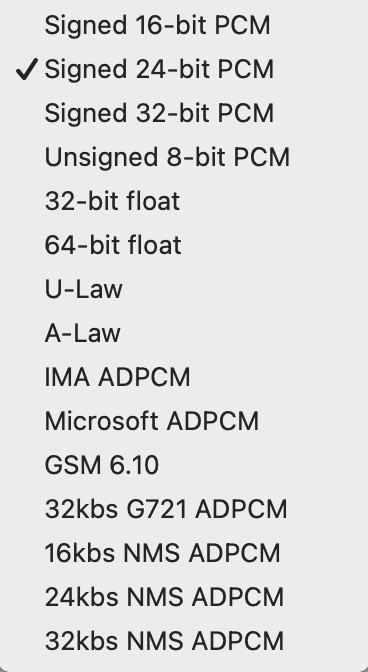

### Bit-depth
Higher bit depth = more accurate representation of amplitude = better dynamic range

an N-bit number has 2^N possible values
- 2^1 = 2
- 2^2 = 4
- 2^4 = 16
- 2^8 = 256
- 2^16 = 65536
- 2^24 = 16,777,216

High bit depth doesn't allow you to represent louder sounds but allows you to represent quieter sounds with more fidelity.

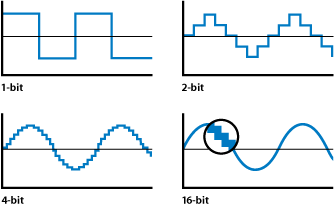

### signed vs unsigned numbers

Signed numbers use one of the bits of a number to tell if it is positive or negative

Eg. 8-bit unsigned can represent 0 -> 255, -128 -> 127

Signed numbers make sense for digital audio because when converted to voltage by a DAC, they represent voltages above and below a stable reference point with the number 0 corresponding to 0 Volts.

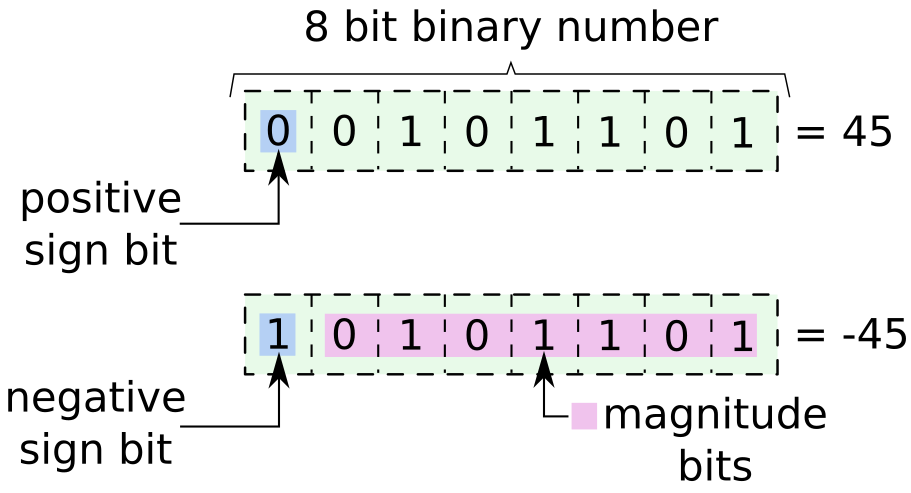

### sf.read documentation

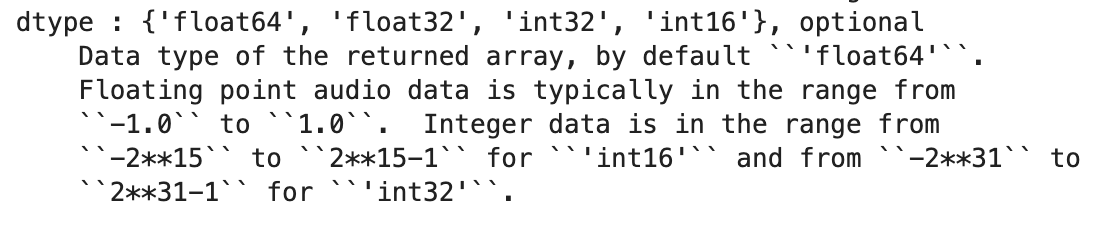

### float vs integer

In [ ]:
help(sf.read)

Range of 32-bit float: -3.4x10^38 -> 3.4x10^38

float can represent decimal values

we can use floats in audio processing, -1 represents the lowest voltage output, 1 represents the highest voltage ouput, 0 represents the resting (or silence) level.

benefit is... during audio processing floats allow us to represent numbers with greater magnitude than 1 without clipping, we just need to be sure that when we normalize it to one (or below) before exporting

In [ ]:
help(sf.read)

## Task
Using a loop, create a function that goes through every sample of the 'Sawtooth.wav' file and determines if the sample is negative. If it is, the sample should be multiplied by -1 and put in a new array, if it's not then leave it positive and put it in the new array. This will simulate the first stage of an AC rectifier.

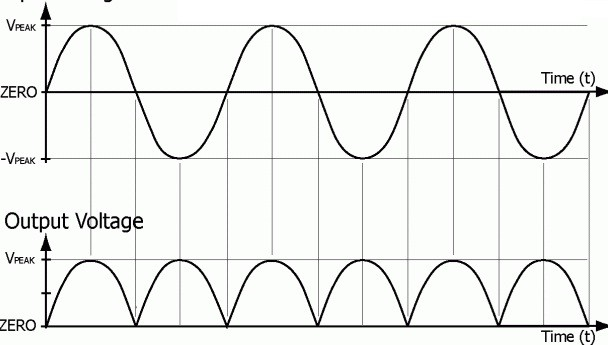

- Name of the function: rectifier
    - Inputs:
        - in_sig (numpy array): array of audio data
    - Outputs
        - out_sig (numpy array): rectified audio data

In [15]:
def rectifier(in_data):
    in_size = np.size(in_data)
    out_array = np.zeros(in_size)
    for i in range(in_size):
        if(in_data[i] < 0):
            out_array[i] = in_data[i] * -1
        else:
            out_array[i] = in_data[i]
    return out_array

[ 0.          0.23566953  0.45649504 ... -0.6492639  -0.45649504
 -0.23566953]
96000


(0.0, 1000.0)

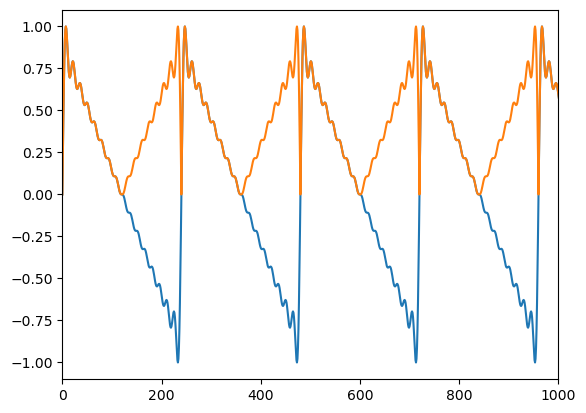

In [23]:
x = sf.read('Sawtooth.wav')[0]
print(x)

print(len(x))
x_rec = rectifier(x)
plt.plot(x)
plt.plot(x_rec)
plt.xlim(0,1000)

# Synthesis of Digital Waveforms

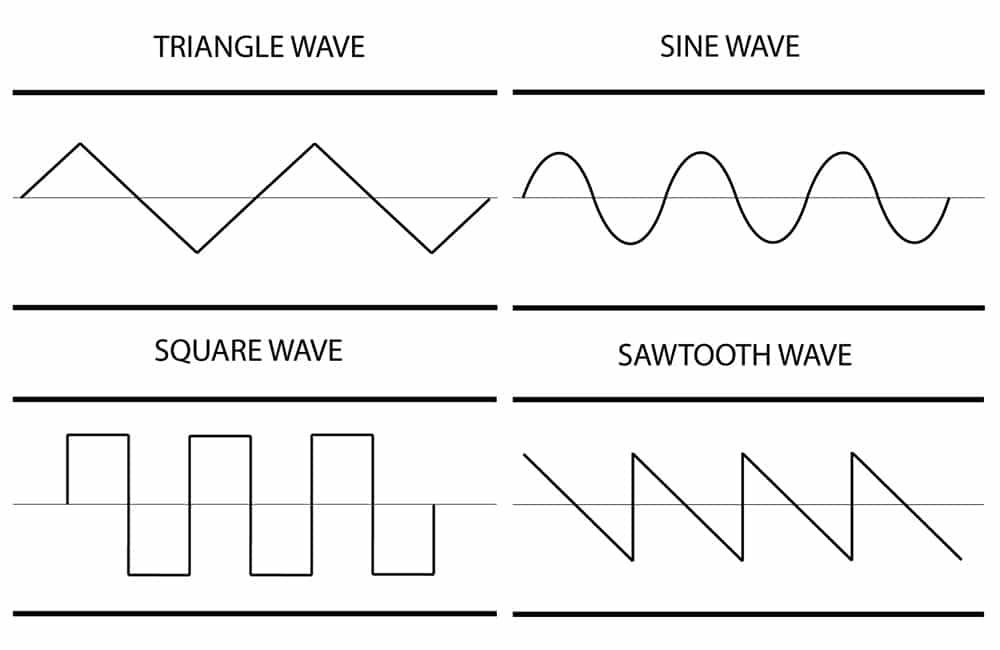

### Sine wave
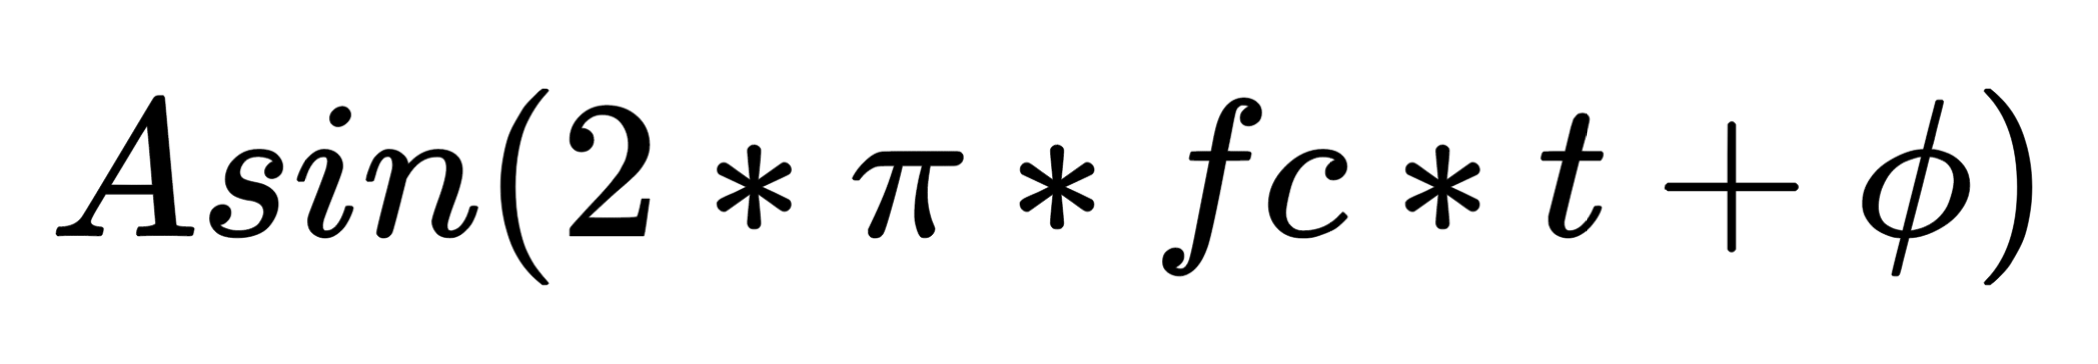
- A: Amplitude
- fc: Frequency in Hz
- phi: phase offset in radians
- time: specific point in time (in seconds) we are evaluating this equation at (IMPORTANT: one calculation of this equation gives you just one number: the value of this sine wave at one point in time. If we want a full smooth sine wave we need to evaluate it at many points in time)

In [40]:
A = 1
fc = 440
phi = 0
t = 550/100000

my_sine_val = A * np.sin(2 * np.pi * fc * t + phi)
print(my_sine_val)

0.4817536741017165


## We want an array that keeps track of every point in time that we want to evaluate this equation at

Suppose our sampling rate is 48000Hz:

if we want to play a sine wave in this format, we will need to evaluate it 48000 times per second, evenly spaced from 0s to 1s


np.arange(): Return evenly spaced values within a given interval.

In [48]:
# t = [0, 1/48000, 2/48000 ... 48000/48000]
# help(np.arange)

# print(np.arange(0, 10, 2))
print(1/48000)
print( np.arange(0, 1, 1/48000))

2.0833333333333333e-05
[0.00000000e+00 2.08333333e-05 4.16666667e-05 ... 9.99937500e-01
 9.99958333e-01 9.99979167e-01]


In [71]:
sr = 48000

A = 1
fc = 220
phi = np.pi
length = 2

t_v = np.arange(0, length, 1/sr) 

my_sine = A * np.sin(2 * np.pi * fc * t_v + phi)

Audio(my_sine, rate = sr)

Text(0.5, 0, 'Time(seconds)')

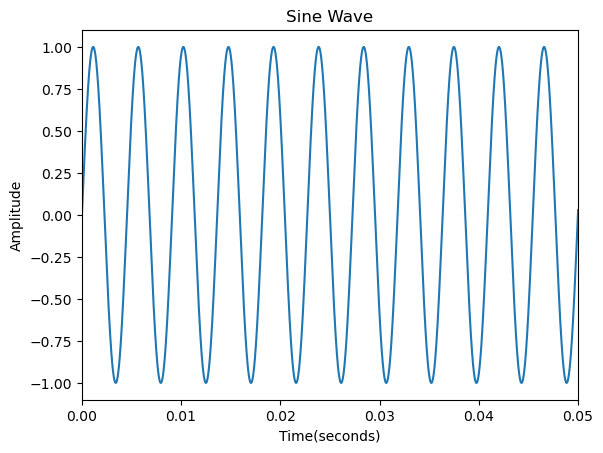

In [64]:
plt.plot(t_v, my_sine)
plt.xlim(0, 0.05)
plt.title('Sine Wave')
plt.ylabel('Amplitude')
plt.xlabel('Time(seconds)')

In [74]:
sr = 48000
length = 2
t_v = np.arange(0, length, 1/sr) 

A = 1
fc = 220
phi = 0

A2 = 1
fc2 = 220
phi2 = np.pi/2

my_sine = A * np.sin(2 * np.pi * fc * t_v + phi)
my_sine2 = A2 * np.sin(2 * np.pi * fc2 * t_v + phi2)

complex_waveform = my_sine + my_sine2

Audio(complex_waveform, rate = sr)

(0.0, 0.01)

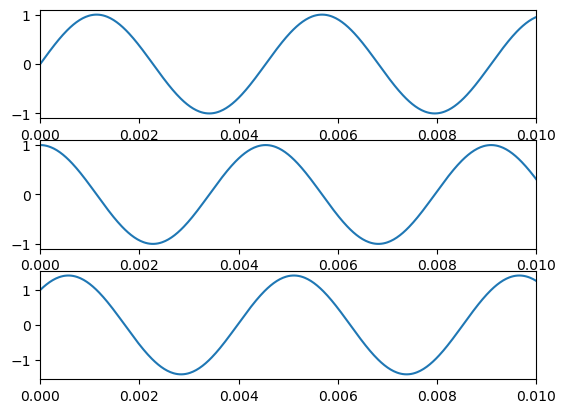

In [75]:
#Plotting graph one
plt.subplot(3,1,1)
plt.plot(t_v,my_sine)
plt.xlim(0,0.01)

#Plotting graph two
plt.subplot(3,1,2)
plt.plot(t_v,my_sine2)
plt.xlim(0,0.01)

#Plotting addition of both graphs
plt.subplot(3,1,3)
plt.plot(t_v,complex_waveform)
plt.xlim(0,0.01)